### Importing Packages

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing titanic dataset

In [7]:
data = pd.read_csv('titanic_dataset.csv')
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Exploratory Data Analysis

#### Missing Data

In [82]:
# Printing the list with missing values

data_null = data.isna().sum()
for col_name, value in zip(data_null.index, data_null.values):
    if value > 0:
        percentage = (value/890)*100
        print(f"missing values in {col_name}: ", f"{round(percentage, 1)} %")
        

missing values in Age:  19.9 %
missing values in Cabin:  77.2 %
missing values in Embarked:  0.2 %


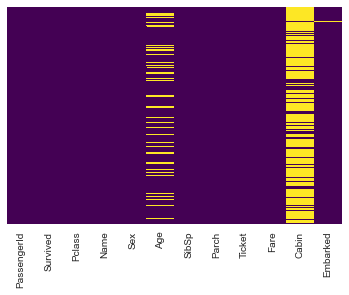

In [83]:
# Visualization method
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

### Some more visualization about the data


 Out of 891 passengers, 549 people died and 342 were survived


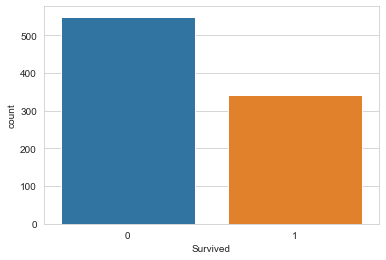

In [131]:
# Counter plot of survived
sns.set_style('whitegrid')
sns.countplot(x="Survived", data=data)

print(f"\n Out of {data['Survived'].count()} passengers, {(data['Survived']==0).sum()} people died " + 
      f"and {(data['Survived']==1).sum()} were survived")


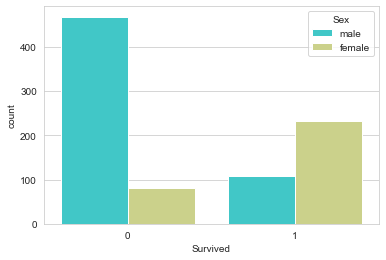

In [136]:
# Category (Sex) based Survived rate 

sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Sex', data=data, palette='rainbow')

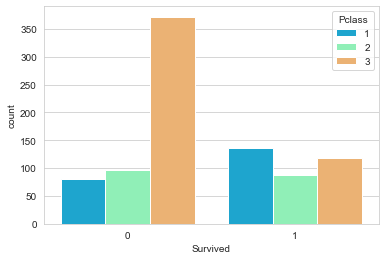

In [87]:
# Category (Pclass) based Survived rate 

sns.set_style('whitegrid')
sns.countplot(x='Survived', hue='Pclass', data=data, palette='rainbow')

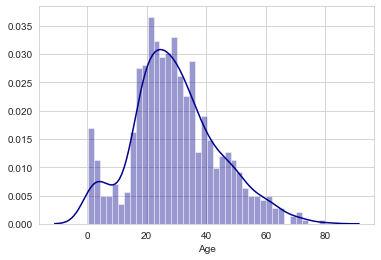

In [140]:
# Check whether the age column follows Normal Distribution or not

sns.distplot(data['Age'].dropna(), kde=True, color='darkblue', bins=40 )

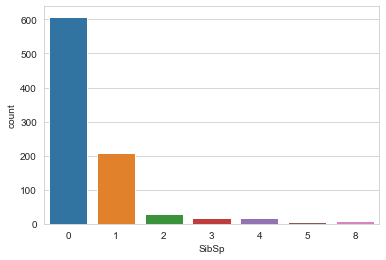

In [93]:
# Categorizing the Siblings and spouse columns

sns.countplot('SibSp', data=data)

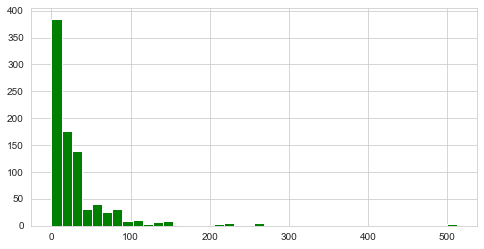

In [144]:
# Fare for the voyage

data['Fare'].hist(color='green', bins=40, figsize=(8,4))

## Data Cleaning

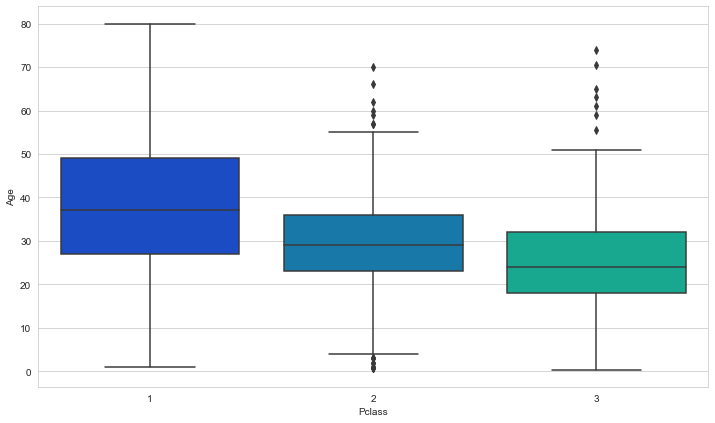

In [151]:
# Data Cleaning

plt.figure(figsize=(12,7))
sns.boxplot(x='Pclass', y='Age', data=data, palette='winter')

In [152]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if (Pclass == 1):
        return 37
    elif (Pclass == 2):
        return 29
    else:
        return 24

In [153]:
# Age is filled with mean values based on the Passenger class

data['Age'] = data[['Age', 'Pclass']].apply(impute_age, axis=1)

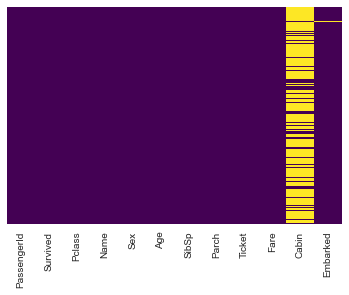

In [158]:
sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [159]:
# Dropping Cabin column

data.drop('Cabin', axis=1, inplace=True)

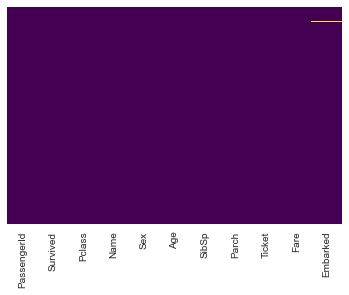

In [160]:
# Cabin column is dropped

sns.heatmap(data.isnull(), yticklabels=False, cbar=False, cmap='viridis')


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int64  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(1), int64(6), object(4)
memory usage: 76.7+ KB


In [162]:
# Using get_dummies method

sex = pd.get_dummies(data['Sex'], drop_first=True)
embark = pd.get_dummies(data['Embarked'], drop_first=True)

In [164]:
data.drop(['Sex', 'Embarked', 'Name', 'Ticket'], inplace=True, axis=1)

In [165]:
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,24,1,0,7.2500
1,2,1,1,37,1,0,71.2833
2,3,1,3,24,0,0,7.9250
3,4,1,1,37,1,0,53.1000
4,5,0,3,24,0,0,8.0500
...,...,...,...,...,...,...,...
886,887,0,2,29,0,0,13.0000
887,888,1,1,37,0,0,30.0000
888,889,0,3,24,1,2,23.4500
889,890,1,1,37,0,0,30.0000


In [169]:
data = pd.concat([data,sex,embark], axis=1)

In [170]:
data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,24,1,0,7.2500,1,0,1
1,2,1,1,37,1,0,71.2833,0,0,0
2,3,1,3,24,0,0,7.9250,0,0,1
3,4,1,1,37,1,0,53.1000,0,0,1
4,5,0,3,24,0,0,8.0500,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,29,0,0,13.0000,1,0,1
887,888,1,1,37,0,0,30.0000,0,0,1
888,889,0,3,24,1,2,23.4500,0,0,1
889,890,1,1,37,0,0,30.0000,1,0,0







#  Making models out of it

In [176]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(data.drop('Survived', axis=1),
                                                    data['Survived'], 
                                                    test_size=0.30, random_state=101)

### Training and Prediction



In [177]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X_train, Y_train)
predictions = logmodel.predict(X_test)

C:\Users\AMIT-VERMA\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [178]:
from sklearn.metrics import confusion_matrix
accuracy = confusion_matrix(Y_test, predictions)
accuracy

array([[134,  20],
       [ 41,  73]], dtype=int64)

In [182]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(Y_test, predictions)
round(accuracy*100,2)

77.24

In [183]:
predictions

array([0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1], dtype=int64)